In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Rock Classifier based on mineral content.
# Here, I try to compare manual model structure ANN and automated PyCaret model

In [ ]:
## 1st load dataset and do simple analysis

In [2]:
df_rock = pd.read_csv('D:\zzz.csv')
df_rock.head()

,Unnamed: 0,Sample,Rock_type,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
0,0,SAR-00-08,andesite,60.4,1.133,16.5,5.85,0.074,2.25,5.20,5.06,2.89,0.557
1,1,SAR-00-07,andesite,60.5,0.828,16.5,4.97,0.075,1.97,4.35,4.76,2.99,0.343
2,2,SAR-00-13,andesite,60.6,1.015,16.4,5.59,0.082,2.24,4.82,5.00,3.00,0.473
3,3,COTA-05-15,andesite,58.9,1.222,16.9,6.56,0.082,2.88,5.64,4.76,2.41,0.482
4,4,COTA-05-06,andesite,59.5,1.169,16.7,6.09,0.077,2.54,5.24,4.58,2.70,0.490


In [20]:
df_rock.shape

(107, 13)

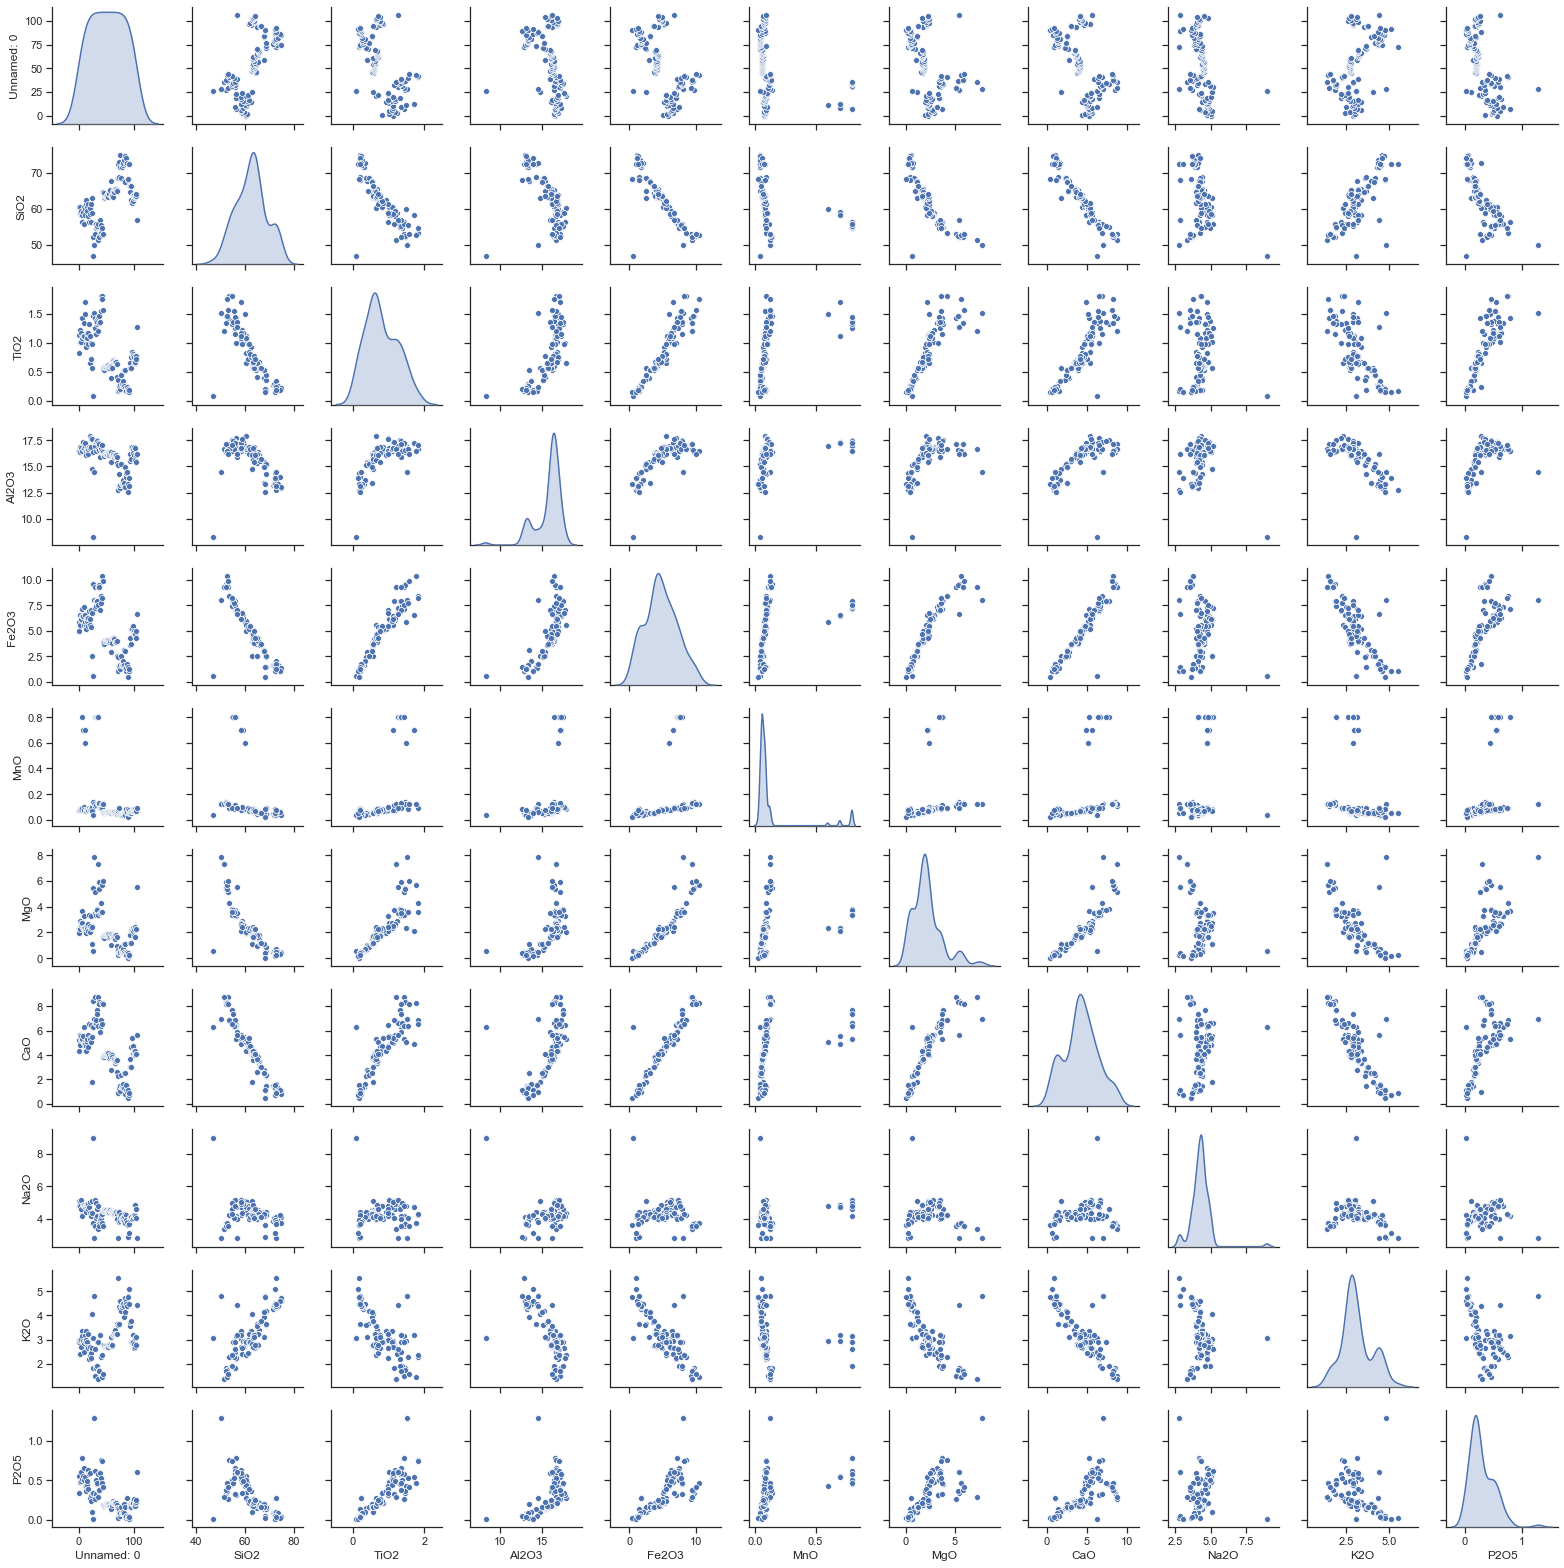

In [3]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_rock, diag_kind="kde", height=2)

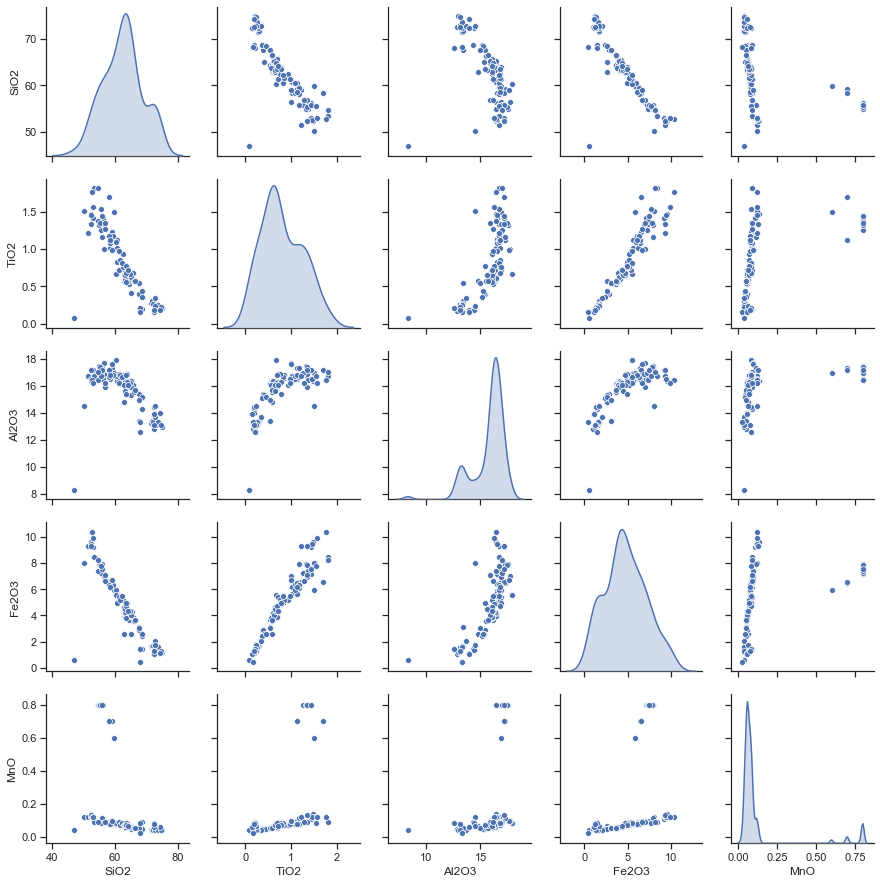

In [4]:
g = sns.pairplot(df_rock[["SiO2","TiO2","Al2O3","Fe2O3","MnO"]], diag_kind="kde")

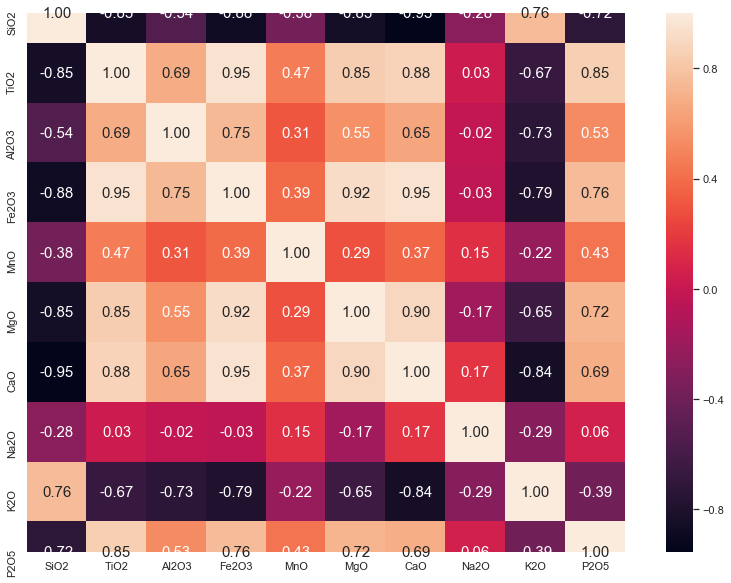

In [5]:
cols = ['SiO2', 'TiO2','Al2O3', 'Fe2O3', 'MnO','MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
cm = np.corrcoef(df_rock[cols].values.T)
sns.set(font_scale=1.0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.tight_layout() 
#plt.savefig('images/10_04.png', dpi=300)
plt.show()

## Split dataset into :test & train

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X, y = df_rock.iloc[:, 3:].values, df_rock.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
le = LabelEncoder()
print(y)

['andesite' 'andesite' 'andesite' 'andesite' 'andesite' 'andesite'
 'andesite' 'andesite' 'andesite' 'andesite' 'andesite' 'andesite'
 'andesite' 'andesite' 'andesite' 'andesite' 'andesite' 'andesite'
 'andesite' 'andesite' 'andesite' 'andesite' 'andesite' 'andesite'
 'andesite' 'andesite' 'andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'basaltic andesite' 'basaltic andesite'
 'basaltic andesite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite'
 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite'
 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite' 'dacite'
 'dacite' 'dacite' 'dacite' 'rhyolite' 'rhyolite' 'rhyolite' 'rhyolite'
 'rhyolite' 'rhyolite' 'rhyolite' 'rhyolite' 'rhyolite' 'rhy

In [7]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)

dummy_y = np_utils.to_categorical(encoded_y)

## Train ANN model using relu - softmax activation function

In [9]:
seed = 7
np.random.seed(seed)

In [10]:
def baseline_model(): 
    # create model 
    model = Sequential()
    model.add(Dense(20, input_dim=10, activation='relu'))
    model.add(Dense(100, input_dim=100, activation='relu'))
    #hidden layer 
    model.add(Dense(100, input_dim=100, activation='relu'))
    #hidden layer 
    model.add(Dense(5, activation='softmax'))
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
#I print the mean accuracy and its standard deviation 
results = cross_val_score(estimator, X_train, dummy_y, cv=kfold) 
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 83.39% (12.22%)


# Let's try the Ahmed Ali hard work on PyCaret python libraries
## PyCaret make some shortage, and integrate some flow at single check point

In [11]:
#I try to use PyCaret. Lets try Ahmed Ali's work"PyCaret".
from pycaret.classification import *

In [45]:
df=df_rock.drop(['Unnamed: 0', 'Sample'], axis = 1) 
exp_clf = setup(df, target = 'Rock_type', train_size = 0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,660
1,Target Type,Multiclass
2,Label Encoded,"andesite: 0, basaltic andesite: 1, dacite: 2, rhyolite: 3, trachyandesite: 4"
3,Original Data,"(107, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [46]:
df.head()

,Rock_type,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
0,andesite,60.4,1.133,16.5,5.85,0.074,2.25,5.20,5.06,2.89,0.557
1,andesite,60.5,0.828,16.5,4.97,0.075,1.97,4.35,4.76,2.99,0.343
2,andesite,60.6,1.015,16.4,5.59,0.082,2.24,4.82,5.00,3.00,0.473
3,andesite,58.9,1.222,16.9,6.56,0.082,2.88,5.64,4.76,2.41,0.482
4,andesite,59.5,1.169,16.7,6.09,0.077,2.54,5.24,4.58,2.70,0.490


In [47]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9464,0,0.94,0.9399,0.9349,0.9308
1,Random Forest Classifier,0.9339,0,0.93,0.9375,0.9256,0.9147
2,Naive Bayes,0.8929,0,0.9,0.911,0.8806,0.8635
3,CatBoost Classifier,0.8911,0,0.89,0.8842,0.8723,0.859
4,Extreme Gradient Boosting,0.8661,0,0.87,0.8696,0.8464,0.8273
5,Logistic Regression,0.8625,0,0.82,0.8045,0.8192,0.8207
6,Gradient Boosting Classifier,0.8625,0,0.86,0.8533,0.838,0.8217
7,Ada Boost Classifier,0.8357,0,0.83,0.8321,0.8137,0.7892
8,Decision Tree Classifier,0.8339,0,0.83,0.8363,0.8098,0.788
9,K Neighbors Classifier,0.8143,0,0.77,0.7619,0.7735,0.759


In [48]:
tuned_et = tune_model('et')
#Nice result

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.00,1.0000,1.0000,1.0000
1,0.8750,0.0,0.80,0.7917,0.8250,0.8367
2,0.8750,0.0,0.90,0.9167,0.8667,0.8400
3,1.0000,0.0,1.00,1.0000,1.0000,1.0000
4,1.0000,0.0,1.00,1.0000,1.0000,1.0000
5,0.8571,0.0,0.90,0.9286,0.8571,0.8205
6,1.0000,0.0,1.00,1.0000,1.0000,1.0000
7,0.8571,0.0,0.80,0.7619,0.8000,0.8108
8,1.0000,0.0,1.00,1.0000,1.0000,1.0000
9,1.0000,0.0,1.00,1.0000,1.0000,1.0000


## We got better result

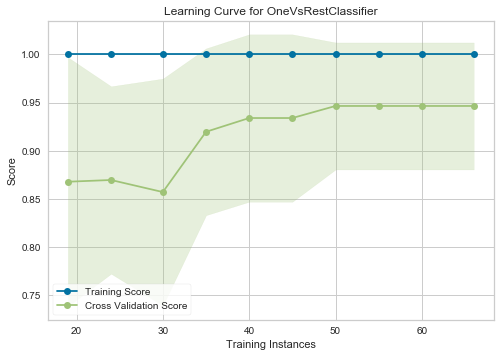

In [49]:
plot_model(estimator = tuned_et, plot = 'learning')
#data size too small with low bias 

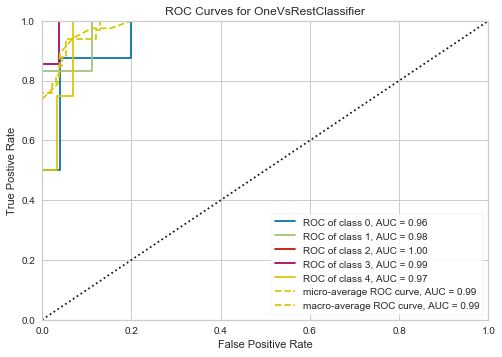

In [50]:
plot_model(estimator = tuned_et, plot = 'auc')

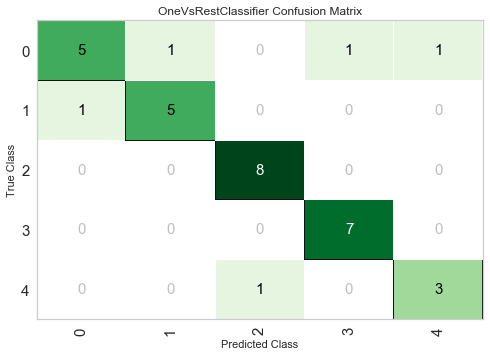

In [51]:
plot_model(estimator = tuned_et, plot = 'confusion_matrix')

In [52]:
X= df_rock.iloc[:, 3:]
predict_model(tuned_et, data=X)

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,Label,Score
0,60.4,1.133,16.5,5.85,0.074,2.25,5.20,5.06,2.89,0.557,0,1.0000
1,60.5,0.828,16.5,4.97,0.075,1.97,4.35,4.76,2.99,0.343,0,1.0000
2,60.6,1.015,16.4,5.59,0.082,2.24,4.82,5.00,3.00,0.473,0,1.0000
3,58.9,1.222,16.9,6.56,0.082,2.88,5.64,4.76,2.41,0.482,0,1.0000
4,59.5,1.169,16.7,6.09,0.077,2.54,5.24,4.58,2.70,0.490,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
102,63.3,0.654,15.6,4.51,0.068,2.38,4.01,4.17,3.08,0.181,4,1.0000
103,63.4,0.678,16.8,4.73,0.084,1.65,4.30,4.83,2.69,0.214,4,0.4341
104,63.5,0.772,15.4,4.95,0.073,2.27,4.10,4.05,3.11,0.227,4,1.0000
105,64.1,0.715,16.1,4.31,0.065,2.28,4.12,4.57,2.77,0.255,2,0.5439
